# Homework 1 - 09/15/2022

#### Joëlle Bagautdinova

Go through the following tutorials, then: 

1) find a paper that shows data thought to come from one of these distributions 
2) write code to simulate data that (roughly) match the distribution shown in the paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

For this exercise, I will use the following paper: 

Alexander, L., Escalera, J., Ai, L. et al. An open resource for transdiagnostic research in pediatric mental health and learning disorders. Sci Data 4, 170181 (2017). https://doi.org/10.1038/sdata.2017.181

This paper introduces the Healthy Brain Network (HBN) dataset by presenting its data collection protocols and some initial quality control figures for brain imaging data. 

I will simulate data to match the approximately Gaussian distributions plotted in figure 5 (EFC panel), which illustrates the Entropy Focus Criteria (EFC) used to measure blurring and ghosting caused by head motion. Data are illustrated for two distinct data collection sites (Staten Island and Rutgers University): 

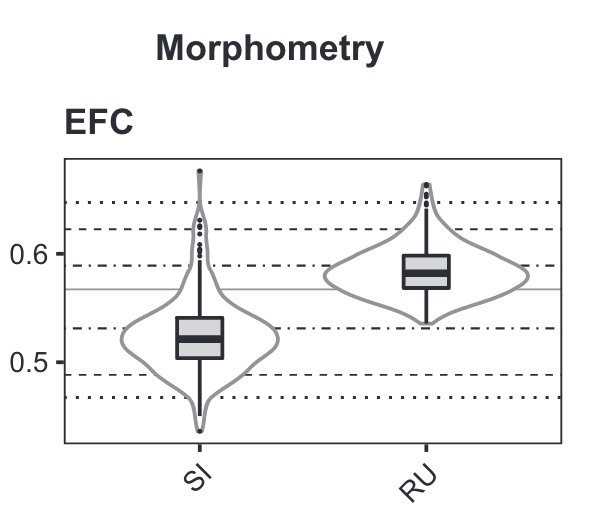

#### Figure legends: 

EFC: Entropy Focus Criteria; used to measure blurring and ghosting caused by head motion. 

SI: Staten Island

RU: Rutgers University


### Data simulation for the SI and RU sites

Given that the figure represents continuous data (motion measure), I will simulate the distribution of the SI and RU sites using a Gaussian probability distribution. 

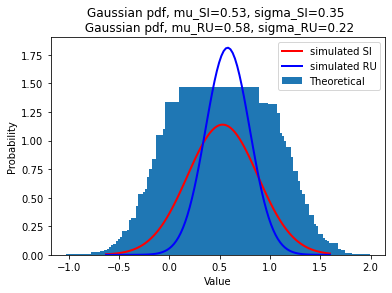

Sample mean = 0.529
Expected value of empirical distribution = 0.529
Expected value of the theoretical distribution = 0.530


In [24]:
N = 10000

# values for the SI site
mu_SI = 0.53
sigma_SI = 0.35

# values for the RU site
mu_RU = 0.58
sigma_RU = 0.22

# define x values
# xaxis = np.linspace(0.3, 0.8, 100)

# Get samples
samples = np.random.normal(mu, sigma, N)

# plot histogram for a given number of bins (using trapz to approximate pdf)
nbins = 100
counts, edges = np.histogram(samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
n_pdf = np.divide(counts, np.trapz(counts, xaxis))
plt.bar(xaxis, n_pdf)

# Show simulated pdf for SI in red
plt.plot(xaxis, st.norm.pdf(xaxis, mu_SI, sigma_SI), 'r-', linewidth = 2)
# Show simulated pdf for RU in blue
plt.plot(xaxis, st.norm.pdf(xaxis, mu_RU, sigma_RU), 'b-', linewidth = 2)

# labels, ets
plt.title(f'Gaussian pdf, mu_SI={mu_SI:.2f}, sigma_SI={sigma_SI:.2f} \n Gaussian pdf, mu_RU={mu_RU:.2f}, sigma_RU={sigma_RU:.2f}')
# plt.xlim(0, 10)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['simulated SI', 'simulated RU', 'Theoretical'])
plt.show()

# Some summary statistics
# 1. The sample mean
print(f'Sample mean = {np.mean(samples):.3f}')

# 2. The expected value of the empirical distribution: the sum of probability x value per bin. This should be similar to the sample mean, but recognize that we lost some information from the binning (i.e., use more bins and this should get closer to the sample mean)
print(f'Expected value of empirical distribution = {np.sum(np.prod([xaxis, np.diff(edges), n_pdf], axis=0)):.3f}')

# 3. The expected value of the theoretical distribution
print(f'Expected value of the theoretical distribution = {np.sum(np.prod([xaxis, np.diff(edges), st.norm.pdf(xaxis, mu, sigma)], axis=0)):.3f}')
